In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data/train_sample.csv")

In [18]:
df

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1/1/1984,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,598,I-Medium Risk,1,1,1,27600,50200,50200,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,305,L-Very High Risk,3,0,0,0,0,0,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,9/12/1977,Self employed,...,0,No Bureau History Available,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,1/8/1988,Salaried,...,735,D-Very Low Risk,4,3,0,390443,416133,416133,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,5/12/1988,Self employed,...,825,A-Very Low Risk,1,0,0,0,0,0,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,1/6/1976,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-94,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0


In [20]:
df.loan_default.value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

In [8]:
df.dtypes

UniqueID                           int64
disbursed_amount                   int64
asset_cost                         int64
ltv                              float64
branch_id                          int64
supplier_id                        int64
manufacturer_id                    int64
Current_pincode_ID                 int64
Date.of.Birth                     object
Employment.Type                   object
DisbursalDate                     object
State_ID                           int64
Employee_code_ID                   int64
MobileNo_Avl_Flag                  int64
Aadhar_flag                        int64
PAN_flag                           int64
VoterID_flag                       int64
Driving_flag                       int64
Passport_flag                      int64
PERFORM_CNS.SCORE                  int64
PERFORM_CNS.SCORE.DESCRIPTION     object
PRI.NO.OF.ACCTS                    int64
PRI.ACTIVE.ACCTS                   int64
PRI.OVERDUE.ACCTS                  int64
PRI.CURRENT.BALA

In [15]:
type(df["PERFORM_CNS.SCORE.DESCRIPTION"][0])

str

In [25]:
(df["PRI.OVERDUE.ACCTS"] == df.loan_default).sum()/len(df)

0.7242123231855341

In [28]:
df.loc[(df["PRI.OVERDUE.ACCTS"] == 1) and (df.loan_default==1)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [29]:
from sklearn.metrics import confusion_matrix

In [75]:
df["Date.of.Birth"]

0          1/1/1984
1          31-07-85
2          24-08-85
3          30-12-93
4         9/12/1977
            ...    
233149     1/8/1988
233150    5/12/1988
233151     1/6/1976
233152     26-03-94
233153     18-02-84
Name: Date.of.Birth, Length: 233154, dtype: object

In [76]:
from datetime import datetime

In [79]:
print(datetime.strptime("1/1/1984", '%d/%m/%Y'))

1984-01-01 00:00:00


In [195]:
date = datetime.strptime("1/1/1984", '%d/%m/%Y')

In [201]:
dir(date)

['__add__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 'astimezone',
 'combine',
 'ctime',
 'date',
 'day',
 'dst',
 'fold',
 'fromisocalendar',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'isocalendar',
 'isoformat',
 'isoweekday',
 'max',
 'microsecond',
 'min',
 'minute',
 'month',
 'now',
 'replace',
 'resolution',
 'second',
 'strftime',
 'strptime',
 'time',
 'timestamp',
 'timetuple',
 'timetz',
 'today',
 'toordinal',
 'tzinfo',
 'tzname',
 'utcfromtimestamp',
 'utcnow',
 'utcoffset',
 'utctimetuple',
 'weekday',
 'year']

In [80]:
a = 5

In [82]:
"{} sfs".format(a)

'5 sfs'

In [107]:
def parser(text):
    for fmt in ('%d-%m-%Y', '%d-%m-%y', '%d.%m.%Y', '%d/%m/%Y'):
        try:
            date = datetime.strptime(text, fmt)
            if data.year > 2004:
                data.year -= 100
                return 
        except ValueError:
            pass
    raise ValueError("No valid date format found")

In [108]:
df.loan_default.values.shape

(233154,)

In [109]:
df2 = pd.read_csv("data/train_sample.csv", parse_dates=["Date.of.Birth"], date_parser=parser)

In [96]:
df2.loc[df2["Date.of.Birth"] =="2062-03-24T00:00:00.000000000"]

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
232708,635420,63454,84578,79.93,78,17078,120,2069,2062-03-24,Self employed,...,18,Not Scored: No Updates available in last 36 mo...,1,1,0,0,771,771,0,1


In [97]:
df.iloc[232708]

UniqueID                                                                    635420
disbursed_amount                                                             63454
asset_cost                                                                   84578
ltv                                                                          79.93
branch_id                                                                       78
supplier_id                                                                  17078
manufacturer_id                                                                120
Current_pincode_ID                                                            2069
Date.of.Birth                                                             24-03-62
Employment.Type                                                      Self employed
DisbursalDate                                                             29-10-18
State_ID                                                                         4
Empl

In [89]:
df["Date.of.Birth"]

0          1/1/1984
1          31-07-85
2          24-08-85
3          30-12-93
4         9/12/1977
            ...    
233149     1/8/1988
233150    5/12/1988
233151     1/6/1976
233152     26-03-94
233153     18-02-84
Name: Date.of.Birth, Length: 233154, dtype: object

In [37]:
df["PRI.OVERDUE.ACCTS"].values.shape

(233154,)

In [48]:
a = df["PRI.OVERDUE.ACCTS"].iloc[:100].values

In [49]:
b = df.loan_default.iloc[:100].values

In [50]:
confusion_matrix(a,b)

array([[61, 27,  0,  0],
       [ 4,  5,  0,  0],
       [ 2,  0,  0,  0],
       [ 0,  1,  0,  0]])

In [51]:
df.loan_default.unique()

array([0, 1])

In [52]:
df["PRI.OVERDUE.ACCTS"].unique()

array([ 0,  1,  3,  2, 14,  4,  5,  8,  6,  7,  9, 18, 13, 11, 12, 17, 10,
       23, 19, 15, 16, 25])

<AxesSubplot:>

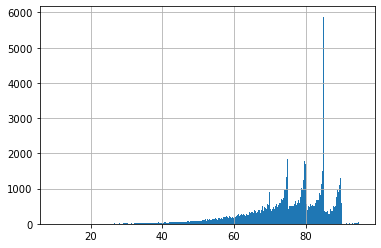

In [56]:
df.ltv.hist(bins=1000)

<AxesSubplot:>

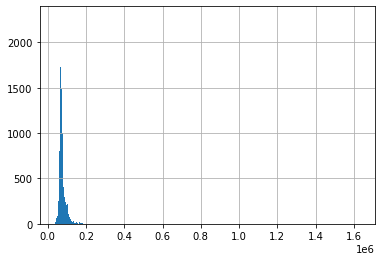

In [63]:
df.asset_cost.hist(bins=10000)

In [64]:
df.asset_cost

0          58400
1          65550
2          61360
3          66113
4          60300
           ...  
233149    105405
233150    100600
233151     71212
233152     73286
233153    116009
Name: asset_cost, Length: 233154, dtype: int64

<AxesSubplot:>

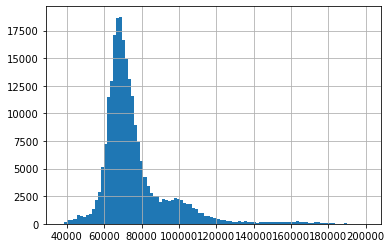

In [68]:
df.asset_cost[df.asset_cost<0.2*1000000].hist(bins=100)

In [72]:
asset_cost = df.asset_cost[df.asset_cost<0.2*1000000]

<AxesSubplot:>

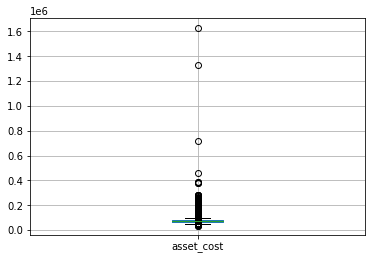

In [61]:
df.boxplot(column="asset_cost")

<AxesSubplot:>

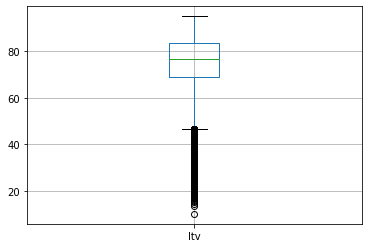

In [62]:
df.boxplot(column="ltv")

In [110]:
import seaborn as sns

<AxesSubplot:xlabel='ltv'>

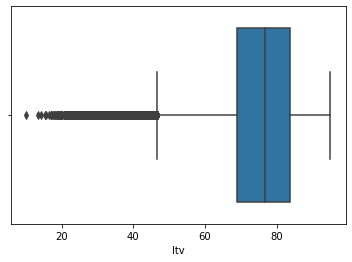

In [111]:
sns.boxplot(x=df.ltv)

In [204]:
def extract_year(x):
    return str(x)[:4]
def check_years(x):
    if x >= 2004:
        return x - 100
    else:
        return x
# df2["year_of_birth"] = df2["Date.of.Birth"].apply(extract_year)
# df2["year_of_birth"] = df2["Date.of.Birth"].apply(lambda x: int(str(x)[:4]))
df2.year_of_birth = df2.year_of_birth.apply(check_years)

In [206]:
df2.year_of_birth.max()

2000

In [124]:
str(df2["Date.of.Birth"][0]).split("-")[0]

'1984'

In [125]:
df2[df2.year_of_birth < 1960]

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default,year_of_birth
169,451694,35939,61865,59.00,34,15196,86,1051,1957-06-01,Self employed,...,No Bureau History Available,0,0,0,0,0,0,0,0,1957
243,537614,22574,48610,47.32,34,23069,51,992,1959-01-01,Self employed,...,A-Very Low Risk,1,0,0,0,0,0,0,0,1959
263,541538,57859,65368,89.65,130,15218,86,1044,1957-02-01,Self employed,...,C-Very Low Risk,2,1,0,413200,35441,35441,0,0,1957
271,502648,51073,62115,85.00,130,21081,45,1226,1955-06-01,Self employed,...,No Bureau History Available,0,0,0,0,0,0,0,0,1955
297,615398,54900,66636,85.00,130,15196,86,1047,1957-05-04,Self employed,...,No Bureau History Available,0,0,0,0,0,0,0,1,1957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232324,601247,52303,67742,79.71,34,15117,45,1075,1957-09-08,Self employed,...,A-Very Low Risk,2,0,0,0,0,0,1,0,1957
232334,485333,51144,62438,84.99,34,16310,86,1063,1957-01-01,Self employed,...,No Bureau History Available,0,0,0,0,0,0,0,1,1957
232400,472151,47845,54580,89.78,74,22928,86,2579,1959-06-01,Self employed,...,Not Scored: Not Enough Info available on the c...,1,1,1,53,53,53,0,0,1959
232465,536765,53078,89455,61.48,65,23895,145,6816,1958-10-01,Self employed,...,No Bureau History Available,0,0,0,0,0,0,0,0,1958


<AxesSubplot:title={'center':'asset_cost'}, xlabel='year_of_birth'>

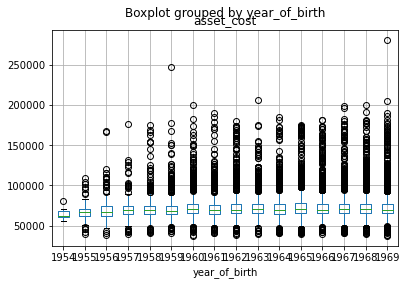

In [128]:
df2[df2.year_of_birth < 1970].boxplot(column="asset_cost", by="year_of_birth")

In [207]:
a = df2.groupby("year_of_birth")["loan_default"].value_counts()

In [208]:
data = pd.DataFrame(a)

In [209]:
data

loan_default
year_of_birth loan_default              
1949          0                        1
1954          0                       17
              1                        4
1955          0                      147
              1                       22
...                                  ...
1998          1                      546
1999          0                     1221
              1                      383
2000          0                      463
              1                      169

[95 rows x 1 columns]

In [210]:
data.unstack()

loan_default        
loan_default             0       1
year_of_birth                     
1949                   1.0     NaN
1954                  17.0     4.0
1955                 147.0    22.0
1956                 293.0    44.0
1957                 345.0    67.0
1958                 504.0   117.0
1959                 685.0   131.0
1960                 991.0   250.0
1961                 954.0   219.0
1962                1202.0   276.0
1963                1251.0   305.0
1964                1442.0   331.0
1965                1914.0   483.0
1966                1849.0   419.0
1967                1999.0   523.0
1968                2456.0   625.0
1969                2522.0   625.0
1970                3217.0   846.0
1971                2936.0   785.0
1972                3523.0   843.0
1973                3541.0   925.0
1974                3793.0   845.0
1975                4488.0  1139.0
1976                4430.0  1151.0
1977                4198.0  1112.0
1978                4672.0  1211.0
1979                4500.0  1114.0
1980                5317.0  1471.0
1981                4898.0  1280.0
1982                5579.0  1439.0
1983                5676.0  1464.0
1984                5907.0  1574.0
1985                6185.0  1737.0
1986                6614.0  1827.0
1987                6739.0  1894.0
1988                7201.0  2031.0
1989                6975.0  1928.0
1990                7815.0  2301.0
1991                7314.0  2071.0
1992                7989.0  2401.0
1993                7679.0  2328.0
1994                8126.0  2404.0
1995                8024.0  2560.0
1996                7740.0  2471.0
1997                5569.0  1920.0
1998                1642.0   546.0
1999                1221.0   383.0
2000                 463.0   169.0

<AxesSubplot:xlabel='year_of_birth'>

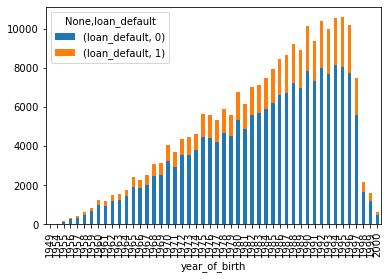

In [211]:
data.unstack().plot(kind="bar", stacked=True)

In [212]:
unstacked_data = data.unstack()

In [213]:
unstacked_data.iloc[0, :]

              loan_default
loan_default  0               1.0
              1               NaN
Name: 1949, dtype: float64

In [214]:

unstacked_data[0: 1]["loan_default"][0]

year_of_birth
1949    1.0
Name: 0, dtype: float64

In [215]:
unstacked_data["percentage"] = unstacked_data["loan_default"][1]/(unstacked_data["loan_default"][0]+unstacked_data["loan_default"][1])

In [216]:
unstacked_data

loan_default         percentage
loan_default             0       1           
year_of_birth                                
1949                   1.0     NaN        NaN
1954                  17.0     4.0   0.190476
1955                 147.0    22.0   0.130178
1956                 293.0    44.0   0.130564
1957                 345.0    67.0   0.162621
1958                 504.0   117.0   0.188406
1959                 685.0   131.0   0.160539
1960                 991.0   250.0   0.201450
1961                 954.0   219.0   0.186701
1962                1202.0   276.0   0.186739
1963                1251.0   305.0   0.196015
1964                1442.0   331.0   0.186689
1965                1914.0   483.0   0.201502
1966                1849.0   419.0   0.184744
1967                1999.0   523.0   0.207375
1968                2456.0   625.0   0.202856
1969                2522.0   625.0   0.198602
1970                3217.0   846.0   0.208221
1971                2936.0   785.0   0.210965
1972                3523.0   843.0   0.193083
1973                3541.0   925.0   0.207120
1974                3793.0   845.0   0.182191
1975                4488.0  1139.0   0.202417
1976                4430.0  1151.0   0.206235
1977                4198.0  1112.0   0.209416
1978                4672.0  1211.0   0.205847
1979                4500.0  1114.0   0.198432
1980                5317.0  1471.0   0.216706
1981                4898.0  1280.0   0.207187
1982                5579.0  1439.0   0.205044
1983                5676.0  1464.0   0.205042
1984                5907.0  1574.0   0.210400
1985                6185.0  1737.0   0.219263
1986                6614.0  1827.0   0.216444
1987                6739.0  1894.0   0.219391
1988                7201.0  2031.0   0.219996
1989                6975.0  1928.0   0.216556
1990                7815.0  2301.0   0.227461
1991                7314.0  2071.0   0.220671
1992                7989.0  2401.0   0.231088
1993                7679.0  2328.0   0.232637
1994                8126.0  2404.0   0.228300
1995                8024.0  2560.0   0.241875
1996                7740.0  2471.0   0.241994
1997                5569.0  1920.0   0.256376
1998                1642.0   546.0   0.249543
1999                1221.0   383.0   0.238778
2000                 463.0   169.0   0.267405

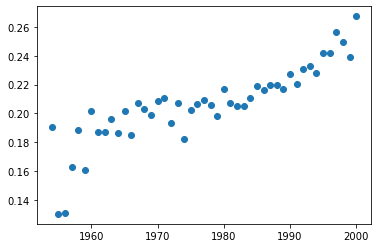

In [217]:
plt.scatter(unstacked_data.index, unstacked_data["percentage"])